In [23]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#reading file

path  = r'C:\Users\97250\Desktop\studied\R ,python\data science JOSE\20-Natural-Language-Processing\yelp.csv'
data = pd.read_csv(path,header=0 )


# helpfull function
def show(column,plot=True):

    """
    This function shows info about given column on ranking
    """
    
    agg =  data.groupby('stars').mean().reset_index()[[column,'stars']]
    
    print('\n The values of' ,column,'and stars are:\n\n',agg)
    print('\n The correlation of',column,'and stars is:\n\n',agg.corr())

    if plot:
        plt.figure(figsize=(10,10))
        sns.boxplot(data=data[['stars',column]],x='stars',y=column)

In [24]:
#########           Feature Selection    ##########
    
    

###         adding columns

# adding length of review    The most affectin feature so far
data['words'] = data['text'].apply(lambda x:len(x.split()))


###       adding dates kind to data

data['timeStamp'] = data['date'].apply(lambda x : pd.to_datetime(x))

data['month'] = data['timeStamp'].apply(lambda x : x.month)
data['day of month'] = data['timeStamp'].apply(lambda x : x.day)

dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
data['day of week'] = data['timeStamp'].apply(lambda x:dmap[x.dayofweek])

######################

"""
 conclusion: seasonal variables aren't helpfull at all.
    A huge affect between words number and ranking, both mean and variance
 dates don't affect on rank in general or top reviewers
"""

"\n conclusion: seasonal variables aren't helpfull at all.\n    A huge affect between words number and ranking, both mean and variance\n dates don't affect on rank in general or top reviewers\n"

In [25]:
###          NLP section



#question/answer marks

data['answer_mark'] = data['text'].apply(lambda x:x.count('!'))
data['question_mark'] = data['text'].apply(lambda x:x.count('?'))


anger_words                  = ['fuck','fucking','annoying','shitty','ass','busy','too loud','too busy','too noisy','disaster','bad','not'] #corr 0.94
anger_words_without_ambigous = ['fuck','fucking','annoying','shitty','ass','busy','too loud','too busy','too noisy','disaster','bad']       #corr 0.998
fucking_bad                  = ['fucking','bad']      #corr 0.9937


listsStrs   = 'anger_words,anger_words_without_ambigous,fucking_bad'.split(',')
listsValues = [anger_words,anger_words_without_ambigous,fucking_bad]


#sum of each words group

def angry(text):
    summ=0
    for word in text.lower().split():
        if word in l:
            summ+=1
    return summ


# create 3 more columns and present data
    
for c,l in enumerate(listsValues):
    #adding column
    data[str(listsStrs[c])] = data['text'].apply(angry)
    
    #   show the impact of the specific column
    
    a  =  data.groupby('stars').mean().reset_index()[[listsStrs[c],'stars']]
    #shows data
    print('\n\n\n\n The values of rank and '+ listsStrs[c] +' is:\n\n',a.set_index('stars'))
    #shows correaltion
    print('\n\n The correlation between rank and '+ listsStrs[c] +' is:\n\n',a.corr())

## seems like fucking_bad words ,has the best coorelation: 0.99!!


#####################
    

#########################################################





 The values of rank and anger_words is:

        anger_words
stars             
1         1.404539
2         1.421791
3         1.102669
4         0.758083
5         0.542104


 The correlation between rank and anger_words is:

              anger_words     stars
anger_words     1.000000 -0.967275
stars          -0.967275  1.000000




 The values of rank and anger_words_without_ambigous is:

        anger_words_without_ambigous
stars                              
1                          0.252336
2                          0.197411
3                          0.152635
4                          0.113159
5                          0.070123


 The correlation between rank and anger_words_without_ambigous is:

                               anger_words_without_ambigous     stars
anger_words_without_ambigous                      1.000000 -0.998033
stars                                            -0.998033  1.000000




 The values of rank and fucking_bad is:

        fucking_bad
star

In [12]:
#           Advanced Reasearch
    
    
    
    ###   unusuefull use of the mediate function

# devied data to:
top_50_reviwed_besinesses = data.groupby('business_id').count()['words'].sort_values(ascending=False).iloc[:51].drop('#NAME?')
dataOfTop50 = data.set_index('business_id').loc[top_50_reviwed_besinesses.index]


# 30 highly reviewers
top_30_users = data.groupby('user_id').count()['words'].sort_values(ascending=False).iloc[:31].drop('#NAME?')
# data of them
dataOf_Top30Users = data.set_index('user_id').loc[top_30_users.index]

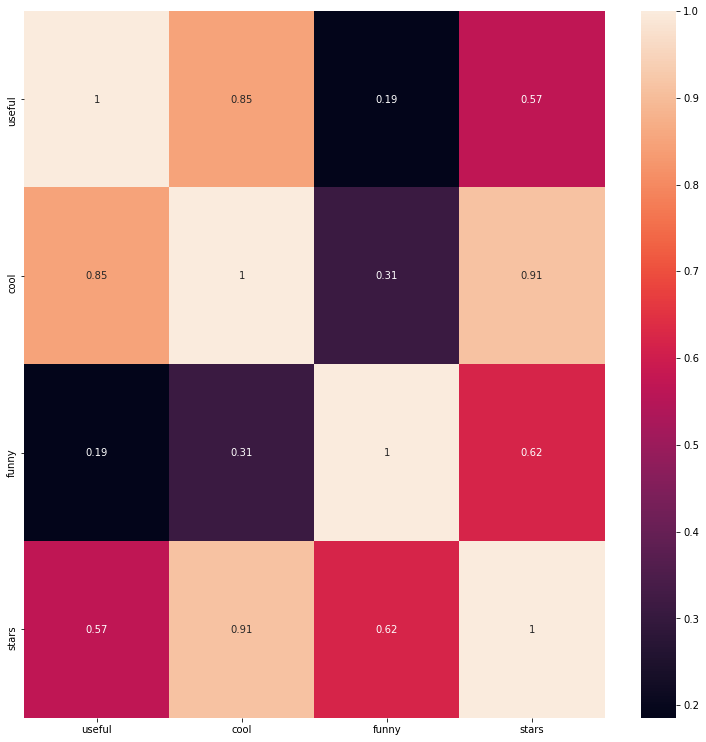

In [5]:
# general corr of ranking columns

plt.figure(figsize=(13,13))
sns.heatmap(abs(data.groupby('stars').var().reset_index()[['useful','cool','funny','stars']].corr()),annot=True)

   question_mark  stars
0       0.732977      1
1       0.615965      2
2       0.410678      3
3       0.254963      4
4       0.227450      5

               question_mark    stars
question_mark        1.00000 -0.97824
stars               -0.97824  1.00000
          words     stars
words  1.000000 -0.987991
stars -0.987991  1.000000 



               question_mark    stars
question_mark        1.00000 -0.97824
stars               -0.97824  1.00000 





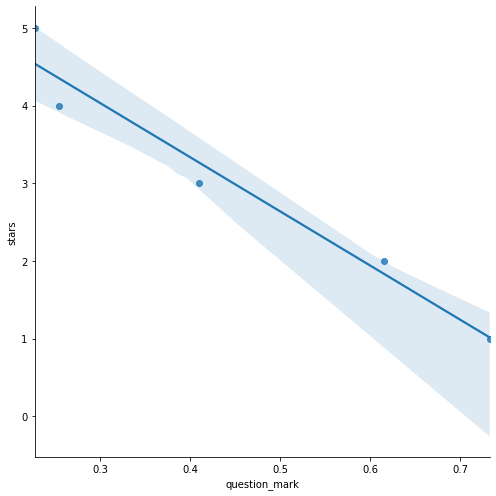

In [10]:
questionMark_toRank = data.groupby('stars').mean().reset_index()[['question_mark','stars']]
print(questionMark_toRank,questionMark_toRank.corr(),sep = '\n\n')

###         question mark highly affects rank.  corr:0.97

print(data.groupby('stars').var().reset_index()[['words','stars']].corr(),'\n\n\n')


sns.lmplot(height=7,x='question_mark',y='stars',data = questionMark_toRank)
print(questionMark_toRank.corr(),'\n\n\n')

In [16]:
### strong correlation
dataOf_rankOfTopUsers_andWordsAvg = dataOf_Top30Users.groupby(['stars','user_id']).mean().unstack(0)['words']

a = dataOf_rankOfTopUsers_andWordsAvg.transpose()

print("the variance of the top viewers in all their views:\n\n",a.var(),'\n\n')
print("the mean of the top viewers in all their views:\n\n" ,a.mean())

the variance of the top viewers in all their views:

 user_id
0CMz8YaO3f8xu4KqQgKb9Q     1850.570574
0bNXP9quoJEgyVZu9ipGgQ     8052.402556
0mqHhdKEdak_A1FBhFNXqA     2165.472222
3gIfcQq5KxAegwCPXc83cQ    15149.391111
4ozupHULqGyO42s3zNUzOQ     1009.690370
6ts41fCsDKHbFZaKOMNmVQ      545.375833
7GC9fVWKa4a1ZmBGLH6Uww    18281.480556
90a6z--_CUrl84aCzZyPsg       99.571181
APLIPfq1Rf8QyhHHk2uAyA    56920.972222
Cp-PV8rsypbO-xBrQ6KmQg    15002.604167
JffajLV-Dnn-eGYgdXDxFg     2282.783704
JgDkCER12uiv4lbpmkZ9VA     5607.147222
Kqvfep2mxS10S50FbVDi4Q       41.470026
M6oU3OBf_E6gqlfkLGlStQ     4392.893750
P2kVk4cIWyK4e4h14RhK-Q     2259.920573
ST8Yzlk2MqKlcaLqL2djBg      242.386831
T5mD6ggC7fh48QgXR0LevA      183.098958
W_QXYA7A0IhMrvbckz7eVg     1581.265625
XqMkm-DD9VsdcKx2YVGhSA     1430.132086
_PzSNcfrCjeBxSLXRoMmgQ     2048.335069
fczQCSmaWF78toLEmb0Zsw     3367.954254
fev0iI-XDrteD4SYRKjiUw     6499.106296
ikm0UCahtK34LbLCEw4YTw    14193.609410
joIzw_aUiNvBTuGoytrH7g     3696.670222
lP

In [26]:
######        Machine Learning Section    ###########

#       drop session

# drop time features
data.drop(['day of month','date','timeStamp','day of week'],axis=1,inplace=True)
# drop unnessary columns
data.drop(['type','review_id'],axis=1,inplace=True)

# drop categorial features 
data.drop(['user_id','text','business_id'],axis=1,inplace=True)
## Do notice!   some of features here are highly expensive.
# besiness_id - some business may be reaky successfull
        # after finding t
        #op businesses , make dummies of them and concat
# text - BOW- This is the essential of this task
# user_id - in deep learning find the specific -highly reviewers-users
        # and get dummies and see what is the affect of them
        

###################

X = data.drop('stars',axis=1)
y = data[['stars']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


#evaluation function
from sklearn.metrics import mean_absolute_error,mean_squared_error

def evaluate():
    """
    Evaluation function
    
    No input
    
    Print model's evaluation by what's in 'predictions' variable
    """
    
    MAE = round(mean_absolute_error(predictions,y_test),5)
    
    print('\n\n')
    print('The RMSE is: ' , round(np.sqrt(mean_squared_error(predictions,y_test)),5))
    print('The MAE  is: ' , round(MAE,5))
    
    print('\n')
    print('The mean is: ', y.mean())
    print('The rational MAE is: ' , round(MAE/y.mean(),3))



####          tree      #####


from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
#cross_val_score(regressor, X_train, y_train, cv=10)

regressor.fit(X_train,y_train)

predictions = regressor.predict(X_test)

In [28]:

evaluate()

##0.86






The RMSE is:  1.58784
The MAE  is:  1.16953


The mean is:  stars    3.7775
dtype: float64
The rational MAE is:  stars    0.31
dtype: float64
